<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%203%20Lesson%202%20-%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

from synthetic_dataset_util import get_series
from synthetic_dataset_util import get_x_train_x_valid

series = get_series()

split_time = 1000

x_train,x_valid, time_train, time_valid= get_x_train_x_valid()

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [4]:
from synthetic_dataset_util import windowed_dataset
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 204.5025 - mae: 205.0025
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 203.6517 - mae: 204.1517
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 202.2836 - mae: 202.7836
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 200.5561 - mae: 201.0561
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 198.5219 - mae: 199.0219
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 196.1805 - mae: 196.6805
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 193.4951 - mae: 193.9951
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 190.4282 - mae: 190.9282
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 186.9092 - mae: 187.4092
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 182.8661 - mae: 183.3661
Epoch 11/100
8/8 [====================

Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 14.0178 - mae: 14.5122
Epoch 89/100
8/8 [==============================] - 0s 8ms/step - loss: 22.5559 - mae: 23.0528
Epoch 90/100
8/8 [==============================] - 0s 8ms/step - loss: 33.9549 - mae: 34.4525
Epoch 91/100
8/8 [==============================] - 0s 8ms/step - loss: 34.7891 - mae: 35.2881
Epoch 92/100
8/8 [==============================] - 0s 6ms/step - loss: 38.6426 - mae: 39.1412
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2179 - mae: 21.7151
Epoch 94/100
8/8 [==============================] - 0s 6ms/step - loss: 23.7335 - mae: 24.2296
Epoch 95/100
8/8 [==============================] - 0s 5ms/step - loss: 41.3774 - mae: 41.8747
Epoch 96/100
8/8 [==============================] - 0s 6ms/step - loss: 90.7563 - mae: 91.2561
Epoch 97/100
8/8 [==============================] - 0s 6ms/step - loss: 110.7932 - mae: 111.2932
Epoch 98/100
8/8 [==============================

(1e-08, 0.0001, 0.0, 30.0)

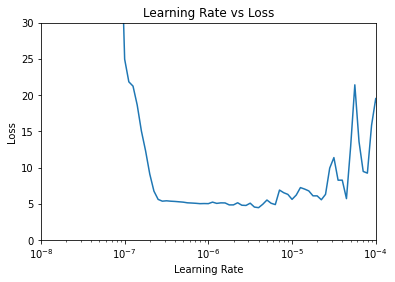

In [5]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.axis([1e-8, 1e-4, 0, 30])

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)

Epoch 1/400
8/8 [==============================] - 0s 11ms/step - loss: 87.3925 - mae: 87.8925
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 28.6904 - mae: 29.1889
Epoch 3/400
8/8 [==============================] - 0s 6ms/step - loss: 18.0063 - mae: 18.4997
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 14.8380 - mae: 15.3303
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 13.2290 - mae: 13.7227
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 10.7418 - mae: 11.2346
Epoch 7/400
8/8 [==============================] - 0s 7ms/step - loss: 8.1608 - mae: 8.6479
Epoch 8/400
8/8 [==============================] - 0s 6ms/step - loss: 11.4590 - mae: 11.9499
Epoch 9/400
8/8 [==============================] - 0s 6ms/step - loss: 11.3756 - mae: 11.8677
Epoch 10/400
8/8 [==============================] - 0s 8ms/step - loss: 8.9769 - mae: 9.4639
Epoch 11/400
8/8 [==============================] - 0s 7ms/ste

8/8 [==============================] - 0s 5ms/step - loss: 7.3581 - mae: 7.8471
Epoch 89/400
8/8 [==============================] - 0s 6ms/step - loss: 5.3173 - mae: 5.7962
Epoch 90/400
8/8 [==============================] - 0s 6ms/step - loss: 4.9397 - mae: 5.4184
Epoch 91/400
8/8 [==============================] - 0s 5ms/step - loss: 5.3334 - mae: 5.8119
Epoch 92/400
8/8 [==============================] - 0s 5ms/step - loss: 4.9373 - mae: 5.4197
Epoch 93/400
8/8 [==============================] - 0s 6ms/step - loss: 4.9759 - mae: 5.4520
Epoch 94/400
8/8 [==============================] - 0s 5ms/step - loss: 4.9653 - mae: 5.4441
Epoch 95/400
8/8 [==============================] - 0s 6ms/step - loss: 4.7715 - mae: 5.2478
Epoch 96/400
8/8 [==============================] - 0s 6ms/step - loss: 5.2687 - mae: 5.7498
Epoch 97/400
8/8 [==============================] - 0s 6ms/step - loss: 5.4055 - mae: 5.8849
Epoch 98/400
8/8 [==============================] - 0s 6ms/step - loss: 7.0237 - ma

8/8 [==============================] - 0s 5ms/step - loss: 4.7460 - mae: 5.2268
Epoch 176/400
8/8 [==============================] - 0s 5ms/step - loss: 5.2084 - mae: 5.6880
Epoch 177/400
8/8 [==============================] - 0s 6ms/step - loss: 4.8231 - mae: 5.3037
Epoch 178/400
8/8 [==============================] - 0s 6ms/step - loss: 4.9940 - mae: 5.4765
Epoch 179/400
8/8 [==============================] - 0s 6ms/step - loss: 5.3258 - mae: 5.8101
Epoch 180/400
8/8 [==============================] - 0s 5ms/step - loss: 4.3357 - mae: 4.8099
Epoch 181/400
8/8 [==============================] - 0s 5ms/step - loss: 4.1373 - mae: 4.6155
Epoch 182/400
8/8 [==============================] - 0s 7ms/step - loss: 4.2537 - mae: 4.7299
Epoch 183/400
8/8 [==============================] - 0s 5ms/step - loss: 5.0810 - mae: 5.5640
Epoch 184/400
8/8 [==============================] - 0s 5ms/step - loss: 5.2357 - mae: 5.7170
Epoch 185/400
8/8 [==============================] - 0s 5ms/step - loss: 5

8/8 [==============================] - 0s 8ms/step - loss: 4.5810 - mae: 5.0615
Epoch 263/400
8/8 [==============================] - 0s 5ms/step - loss: 4.5178 - mae: 4.9957
Epoch 264/400
8/8 [==============================] - 0s 7ms/step - loss: 4.7290 - mae: 5.2090
Epoch 265/400
8/8 [==============================] - 0s 5ms/step - loss: 4.4349 - mae: 4.9123
Epoch 266/400
8/8 [==============================] - 0s 5ms/step - loss: 4.1118 - mae: 4.5846
Epoch 267/400
8/8 [==============================] - 0s 6ms/step - loss: 4.7944 - mae: 5.2718
Epoch 268/400
8/8 [==============================] - 0s 6ms/step - loss: 4.5990 - mae: 5.0764
Epoch 269/400
8/8 [==============================] - 0s 6ms/step - loss: 4.1206 - mae: 4.5991
Epoch 270/400
8/8 [==============================] - 0s 6ms/step - loss: 4.1855 - mae: 4.6610
Epoch 271/400
8/8 [==============================] - 0s 5ms/step - loss: 5.3695 - mae: 5.8535
Epoch 272/400
8/8 [==============================] - 0s 5ms/step - loss: 8

8/8 [==============================] - 0s 8ms/step - loss: 4.6695 - mae: 5.1443
Epoch 350/400
8/8 [==============================] - 0s 6ms/step - loss: 4.9879 - mae: 5.4719
Epoch 351/400
8/8 [==============================] - 0s 6ms/step - loss: 5.3045 - mae: 5.7877
Epoch 352/400
8/8 [==============================] - 0s 7ms/step - loss: 4.5525 - mae: 5.0326
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 4.5005 - mae: 4.9754
Epoch 354/400
8/8 [==============================] - 0s 6ms/step - loss: 4.4628 - mae: 4.9423
Epoch 355/400
8/8 [==============================] - 0s 6ms/step - loss: 4.6075 - mae: 5.0857
Epoch 356/400
8/8 [==============================] - 0s 6ms/step - loss: 4.1194 - mae: 4.5937
Epoch 357/400
8/8 [==============================] - 0s 8ms/step - loss: 4.8888 - mae: 5.3686
Epoch 358/400
8/8 [==============================] - 0s 6ms/step - loss: 4.5818 - mae: 5.0611
Epoch 359/400
8/8 [==============================] - 0s 6ms/step - loss: 5

No handles with labels found to put in legend.


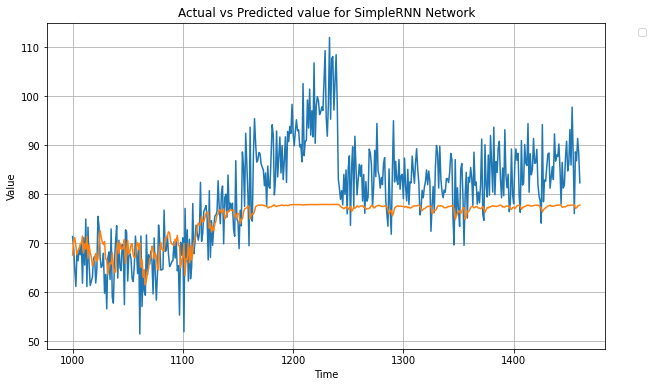

In [7]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))
plt.title('Actual vs Predicted value for SimpleRNN Network')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [8]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

7.3184185

<Figure size 432x288 with 0 Axes>

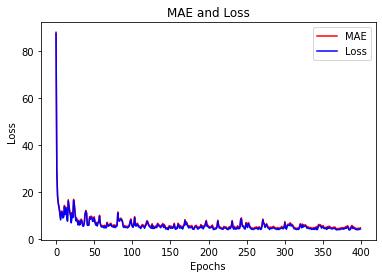

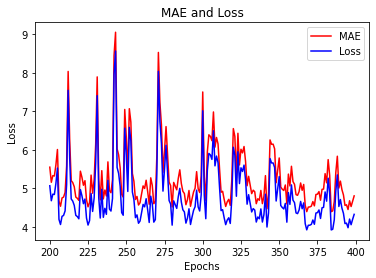

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["MAE", "Loss"])

plt.figure()